# Dataset Purchases

*Report made by Dyjannette Alva Quiroz*

This dataset has a historical collection of purchase card transactions for the Birmingham
City Council.
The time window is from April 2014 to February 2018.
The method used for the forcasting analysis is **ARIMA Model**.

Clic [here](https://data.birmingham.gov.uk/dataset/purchase-card-transactions) to see the dataset website.

## 1. Variables description

1. **TRANS DATE:** date of transaction
2. **TRANS VAT DESC:** VAT transaction description
    - The VAT tax (Value-added tax) is payable by any taxable person making a taxable supply (‘the supplier’) of goods or services, unless it is payable by another person.
    - The VAT rates:
``` python
['VR':reduced rate,'VZ':Zero rate,'VL':Leisure,
 'VT':Transport,'VE':Education,'VS':Standard rate]
```
     
3. **ORIGINAL GROSS AMT:** original gross amount
     - The income amount calculated for tax purposes to be paid.
     
4. **MERCHANT NAME:** A qué proveedor se le compró.
5. CARD NUMBER
6. TRANS CAC CODE 1: Client Account Credit Transaction code
7. **TRANS CAC DESC 1:** Concepto del gasto (viáticos,gasolina,etc)
8. TRANS CAC CODE 2
9. **TRANS CAC DESC 2:** Qué área de la municipalidad compró.
10. TRANS CAC CODE 3
11. **DIRECTORATE:** Bajo qué gerencia o directorio se encuentra el área.
 
>Birmingham City Council Quote (Spanish)
>>*En virtud del Código de prácticas recomendadas para las autoridades locales sobre transparencia de datos, se alienta a los ayuntamientos a publicar todas las transacciones con tarjetas de compra corporativas. Ya publicamos detalles de todos nuestros gastos relevantes de más de £ 500 en nuestra página Pagos a proveedores, y continuaremos haciéndolo.*

## 2. Exploratory Data Analysis (EDA)

Loading some libraries

In [1]:
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

### 2.1 Loading Data

#### 2.1.1 Uploading files from Year 2014

In [2]:
april2014 = pd.read_excel('purchasecardtransactionsapril2014.xls', sheet_name='APR 2014')
may2014 = pd.read_excel('purchasecardtransactionsmay2014.xls', sheet_name='Sheet1')
june2014 = pd.read_excel('purchasecardtransactionsjune2014.xls', sheet_name='Sheet1')
july2014 = pd.read_excel('purchasecardtransactionsjuly2014.xls',sheet_name='JULY 2014')
august2014 = pd.read_excel('purchasecardtransactionsaugust2014.xls',sheet_name='AUG 2014')
september2014 = pd.read_excel('purchasecardtransactionsseptember2014.xls',sheet_name='SEPT 2014')
october2014 = pd.read_excel('purchasecardtransactionsoctober2014.xls',sheet_name='OCT 2014')
november2014 = pd.read_excel('purchasecardsnov2014.xls',sheet_name='Sheet1')
december2014 = pd.read_excel('purchasecardsdec2014.xls',sheet_name='Sheet1')

frames2014 = [april2014,may2014,june2014,july2014,august2014,september2014,
              october2014,november2014,december2014]
year2014 = pd.concat(frames2014)
year2014.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,BILLING CUR CODE,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2014-04-29,VR,52.32,shell kings 587,************5770,GBP,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2014-04-04,VR,65.82,shell kings 587,************5770,GBP,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
2,2014-04-07,VR,41.35,tesco pfs 2484,************8738,GBP,K020,Vehicle Fuel,RV11Y,"Marsh Lane Dce, 79, B23",A00,Adult & Communities


#### 2.1.2 Uploading files from Year 2015

In [3]:
january2015 = pd.read_excel('purchaseccardtransactionsjanuary2015.xls',sheet_name='Sheet1')
january2015 = january2015.rename(columns={'Directorate ':'Directorate'})
february2015 = pd.read_excel('publishspendpurchasecardsfebruary2015.xls',sheet_name='Sheet1')
february2015 = february2015.rename(columns={'Unnamed: 10':'Directorate'})
march2015 = pd.read_excel('publishspendpurchasecardsmarch2015.xls',sheet_name='Sheet1')
may2015 = pd.read_excel('svlrdclr05homesharechexefinainmngeneralappublishspendmay2015.xls',sheet_name='Sheet1')
june2015 = pd.read_excel('publishspendjune2015alldirectorates.xls',sheet_name='Sheet1')
july2015 = pd.read_excel('itemisedtransactionsjuly2015publishspend.xls',sheet_name='Sheet1')
august2015 = pd.read_excel('itemisedtransactionsaugust2015publishspendalldirectorates.xls',sheet_name='Sheet1')
august2015 = august2015.rename(columns={'Directorate ':'Directorate'})
september2015 = pd.read_excel('publishspendseptember2015.xls',sheet_name='Sheet1')
october2015 = pd.read_excel('publishspendoctober2015.xls',sheet_name='Sheet1')
november2015 = pd.read_excel('publishspendnovember2015.xls',sheet_name='Sheet1')
december2015 = pd.read_excel('publishedspenddecember2015.xls',sheet_name='Sheet1')

frames2015 = [january2015,february2015,march2015,may2015,june2015,july2015,
              august2015,september2015,october2015,november2015,december2015]
year2015 = pd.concat(frames2015)
year2015.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2015-01-08,VR,52.84,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2015-01-21,VR,10.00,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
2,2015-01-22,VR,20.01,tesco pay at pump 4203,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities


#### 2.1.3 Uploading files from Year 2016

In [4]:
january2016 = pd.read_excel('publishspendjanuary2016.xls',sheet_name='Sheet1')
february2016 = pd.read_excel('publishspendfebruary2016.xls',sheet_name='Sheet1')
march2016 = pd.read_excel('publishspendmarch2016.xls',sheet_name='Sheet1')
april2016 =pd.read_excel('publish-spend-april-2016.xls',sheet_name='Sheet1')
may2016 = pd.read_excel('publish-spend-may-2016.xls',sheet_name='Sheet1')
june2016 = pd.read_excel('publish-spend-june-2016.xls',sheet_name='Sheet1')
july2016 = pd.read_excel('publish-spend-july-2016.xls',sheet_name='Sheet1')
august2016 = pd.read_excel('publish-spend-august-2016.xls',sheet_name='Sheet1')
september2016 = pd.read_excel('publish-spend-september-2016.xls',sheet_name='Sheet1')
september2016 = september2016.rename(columns={'Directorates':'Directorate'})
october2016 = pd.read_excel('publish-spend-october-2016.xls',sheet_name='Sheet1')
november2016 = pd.read_excel('publishing-spend-november-2016.xls',sheet_name='Sheet1')
december2016 = pd.read_excel('publish-spend-december-2016.xls',sheet_name='Sheet1')

frames2016 = [january2016,february2016,march2016,april2016,may2016,june2016,
              july2016,august2016,september2016,october2016,november2016,december2016]
year2016 = pd.concat(frames2016)
year2016.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2016-01-07,VR,43.56,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
1,2016-01-14,VR,54.70,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
2,2016-01-28,VR,48.10,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities


#### 2.1.4 Uploading files from Year 2017

In [5]:
january2017 = pd.read_excel('cusersfinainmndesktoppublish-copy-january-2017.xls',sheet_name='Sheet1')
february2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-february-2017-all-directorates.xls',sheet_name='Sheet1')
march2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-march-2017.xls',sheet_name='Sheet1')
april2017 =pd.read_excel('cusersfinainmndesktoppublish-spend-april-2017.xls',sheet_name='Sheet1')
may2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-may-2017.xls',sheet_name='Sheet1')
june2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-june--2017.xls',sheet_name='Sheet1')
july2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-july-2017.xls',sheet_name='Sheet1')
august2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-august-2017-all-directorates.xls',sheet_name='Sheet1')
september2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-sept-2017.xls',sheet_name='Sheet1')
#september2017 = september2016.rename(columns={'Directorates':'Directorate'})
october2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-october-2017-all-directorates.xls',sheet_name='Sheet1')
november2017 = pd.read_excel('cusersfinainmndesktoppublish-spend-november-2017-all-directorates.xls',sheet_name='Sheet1')

frames2017 = [january2017,february2017,march2017,april2017,may2017,june2017,
              july2017,august2017,september2017,october2017,november2017]
year2017 = pd.concat(frames2017)
year2017.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,TRANS TAX AMT,BILLING CUR CODE.1,Directorates
0,2017-01-03,VR,72.61,GBP,72.61,GBP,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN,NaN,NaN
1,2017-01-24,VR,85.51,GBP,85.51,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN
2,2017-02-01,VR,10.09,GBP,10.09,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN


#### 2.1.5 Uploading files from Year 2018

In [6]:
year2018 = pd.read_excel('cusersfinainmndesktoppublish-spend-january-2018.xls',sheet_name='Sheet1')
year2018.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2018-01-03,VR,82.2,GBP,82.2,GBP,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
1,2018-02-05,VR,60.0,GBP,60.0,GBP,malthurst limited,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
2,2018-01-29,VR,50.0,GBP,50.0,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health


---
___
**Observations and dropping:** 
- We notice a difference between the number of columns:
    - The year 2014 has 12 columns: the same 11 columns of the years 15 and 16 plus a column named 'Billing CUR Code' which has only one value (GBP).
    - This value is not pertinent to the analysis so it must be removed.
    - After the removal all years will have the same number of columns providing the complete dataset from the time window specified above.
___

In [7]:
year2014 = year2014.drop(columns='BILLING CUR CODE')
year2017 = year2017.drop(columns={'ORIGINAL CUR','BILLING GROSS AMT'
                                  ,'BILLING CUR CODE','TRANS TAX AMT'
                                  ,'BILLING CUR CODE.1','Directorates'})
year2018 = year2018.drop(columns={'ORIGINAL CUR','BILLING GROSS AMT'
                                  ,'BILLING CUR CODE'})
#Changing Year 2017 to date format
year2017['TRANS DATE'] = pd.to_datetime(year2017['TRANS DATE'])

#Concatenating years:
data = pd.concat([year2014,year2015,year2016,year2017,year2018])
data.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2014-04-29,VR,52.32,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2014-04-04,VR,65.82,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
2,2014-04-07,VR,41.35,tesco pfs 2484,************8738,K020,Vehicle Fuel,RV11Y,"Marsh Lane Dce, 79, B23",A00,Adult & Communities


### 2.2 Exploring and cleansing the dataset

In [8]:
data.dtypes

TRANS DATE            datetime64[ns]
TRANS VAT DESC                object
ORIGINAL GROSS AMT           float64
MERCHANT NAME                 object
CARD NUMBER                   object
TRANS CAC CODE 1              object
TRANS CAC DESC 1              object
TRANS CAC CODE 2              object
TRANS CAC DESC 2              object
TRANS CAC CODE 3              object
Directorate                   object
dtype: object

In [9]:
#Let's see the quantity of NULLS in every variable. 
data.isnull().sum()

TRANS DATE               1
TRANS VAT DESC        9844
ORIGINAL GROSS AMT       1
MERCHANT NAME            1
CARD NUMBER              1
TRANS CAC CODE 1       105
TRANS CAC DESC 1       105
TRANS CAC CODE 2       236
TRANS CAC DESC 2       236
TRANS CAC CODE 3       293
Directorate           5393
dtype: int64

In [10]:
data.isnull().sum() * 100 / len(data.index)
    #The quantity of NULLS is less than 5%, making possible the removal of nulls 
    #without impacting the mean of each variable.

TRANS DATE            0.000538
TRANS VAT DESC        5.295064
ORIGINAL GROSS AMT    0.000538
MERCHANT NAME         0.000538
CARD NUMBER           0.000538
TRANS CAC CODE 1      0.056479
TRANS CAC DESC 1      0.056479
TRANS CAC CODE 2      0.126944
TRANS CAC DESC 2      0.126944
TRANS CAC CODE 3      0.157604
Directorate           2.900882
dtype: float64

In [11]:
#The unique values for TRANS VAT DESC
list(data['TRANS VAT DESC'].unique())
    # ['VR', 'VZ', '6.65%', 'VL', 'VT', nan, 'VE', 'VS']
    # Due to the nature of the variable (object) '6.65%' nor nan values are allowed.
data = data[data['TRANS VAT DESC']!='6.65%']
data = data[data['TRANS VAT DESC'].notnull()]
data.isnull().sum()

TRANS DATE               0
TRANS VAT DESC           0
ORIGINAL GROSS AMT       0
MERCHANT NAME            0
CARD NUMBER              0
TRANS CAC CODE 1        94
TRANS CAC DESC 1        94
TRANS CAC CODE 2       233
TRANS CAC DESC 2       233
TRANS CAC CODE 3       289
Directorate           4793
dtype: int64

In [12]:
#The unique values for **TRANS CAC CODE 1
    #This variable is also an object and NULL values must be errased.
data.groupby('TRANS CAC CODE 1')['TRANS DATE'].nunique()
data = data[data['TRANS CAC CODE 1'].notnull()]
    # The variable TRANS CAC DESC 1 and TRANS CAC CODE 1 had the same amount of
    # NULLS, this means these both variables got the same NULL rows.
    # The same situation happens with TRANS CAC CODE 2 and TRANS CAC DESC 2.
data = data[data['TRANS CAC CODE 2'].notnull()]
data.isnull().sum()

TRANS DATE               0
TRANS VAT DESC           0
ORIGINAL GROSS AMT       0
MERCHANT NAME            0
CARD NUMBER              0
TRANS CAC CODE 1         0
TRANS CAC DESC 1         0
TRANS CAC CODE 2         0
TRANS CAC DESC 2         0
TRANS CAC CODE 3        93
Directorate           4752
dtype: int64

In [13]:
#Only TRANS CAC CODE 3 is left to evaluate. 
list(data['TRANS CAC CODE 3'].unique())
data = data[data['TRANS CAC CODE 3'].notnull()]
data.isnull().sum()

TRANS DATE               0
TRANS VAT DESC           0
ORIGINAL GROSS AMT       0
MERCHANT NAME            0
CARD NUMBER              0
TRANS CAC CODE 1         0
TRANS CAC DESC 1         0
TRANS CAC CODE 2         0
TRANS CAC DESC 2         0
TRANS CAC CODE 3         0
Directorate           4745
dtype: int64

In [14]:
#Directory has NULLS and some repeated values
list(data['Directorate'].unique())
data = data[data['Directorate'].notnull()]
print(data.isnull().sum())

print(list(data['Directorate'].unique()))
    #The directories will be the following: 'Adult & Communities'
    #,'Corporate Resources','CYP&F Schools','Development',
    #'Local Services','Corporate Procurement','Adult Social Care and Health'

TRANS DATE            0
TRANS VAT DESC        0
ORIGINAL GROSS AMT    0
MERCHANT NAME         0
CARD NUMBER           0
TRANS CAC CODE 1      0
TRANS CAC DESC 1      0
TRANS CAC CODE 2      0
TRANS CAC DESC 2      0
TRANS CAC CODE 3      0
Directorate           0
dtype: int64
['Adult & Communities', 'Adults & Comms', 'Corporate Resources', 'CYP&F', 'CYP&F  ', 'CYP&F SCHOOLS', 'CYP&F Schools', 'DEVELOPMENT', 'Local Services', 'Development', 'Adults & Communities', 'Local services', 'CYO&F', 'Corporate Procurement', 'Adults', 'CYP&F ', 'Adult Social Care and Health']


In [15]:
#Fixing the repeated values
adults_rep = {'Adult & Communities','Adults & Comms','Adults & Communities','Adults'}
auxiliar = data.replace(adults_rep,'Adults & Communities')
CYPF_Schools_rep = {'CYP&F','CYP&F  ','CYP&F SCHOOLS','CYP&F Schools','CYO&F','CYP&F '}
auxiliar1 = auxiliar.replace(CYPF_Schools_rep,'CYP&F Schools')
development_rep = {'DEVELOPMENT','Development'}
auxiliar2 = auxiliar1.replace(development_rep,'Development')
local_serv_rep = {'Local Services','Local services'}
auxiliar3 = auxiliar2.replace(local_serv_rep,'Local services')
print(list(auxiliar3['Directorate'].unique()))
data = auxiliar3

['Adults & Communities', 'Corporate Resources', 'CYP&F Schools', 'Development', 'Local services', 'Corporate Procurement', 'Adult Social Care and Health']


### 2.3 Exploring and cleansing the dataset

In [16]:
data.select_dtypes('object').nunique()

print('Unique values of TRANS VAT DESC:',data['TRANS VAT DESC'].unique())
print('')
print('Unique values of TRANS CODE 3:',data['TRANS CAC CODE 3'].unique())
print('')
print('Unique values of Directorate:',data['Directorate'].unique())

data.describe()  #The only numerical variable 'ORIGINAL GROSS AMT'

Unique values of TRANS VAT DESC: ['VR' 'VZ' 'VL' 'VT' 'VE' 'VS']

Unique values of TRANS CODE 3: ['A00' 'A9Y' 'A5F' 'A8H' 'A42' 'A01' 'A02' 'A03' 'A04' 'A05' 'A06' 'A07'
 'A08' 'A09' 'A10' 'A11' 'A12' 'A13' 'A7N' 'A46' 'A8F' 'A95' 'A7M' 'A60'
 'A5D' 'A6G' 'REACN']

Unique values of Directorate: ['Adults & Communities' 'Corporate Resources' 'CYP&F Schools'
 'Development' 'Local services' 'Corporate Procurement'
 'Adult Social Care and Health']


,ORIGINAL GROSS AMT
count,170901.000000
mean,150.098339
std,1764.514844
min,-6794.000000
25%,12.100000
50%,38.640000
75%,84.000000
max,280102.230000


## 3. Objective

1. Examine the distribution of amounts per directorate
2. Choosing the directorate with larger Gross amount
3. Outliers' treatment
4. Identify the best method (algorithm) to reach the objective

### 3.1 Examine the distribution of amounts per directorate

In [17]:
df_directory = data.groupby('Directorate')['ORIGINAL GROSS AMT'].agg('sum').reset_index()
df_directory['Percentage'] = 100 * df_directory['ORIGINAL GROSS AMT'] / df_directory['ORIGINAL GROSS AMT'].sum()
df_directory.sort_values('Percentage', ascending=False)

,Directorate,ORIGINAL GROSS AMT,Percentage
4,Corporate Resources,11318502.22,44.123349
2,CYP&F Schools,8486181.54,33.082005
6,Local services,4164827.81,16.235907
1,Adults & Communities,1181774.71,4.606957
5,Development,329230.63,1.283452
3,Corporate Procurement,91544.83,0.356873
0,Adult Social Care and Health,79894.42,0.311455


### 3.2 Choosing the directorate with larger Gross amount

The directorate Corporate Resources shows almost 44% of the expenses so it will be analyzed in detail. 

In [18]:
df_corporate_resources = data[data['Directorate']=='Corporate Resources']
df_corporate_resources['Year'] = pd.DatetimeIndex(df_corporate_resources['TRANS DATE']).year 
df_corporate_resources['Month'] = pd.DatetimeIndex(df_corporate_resources['TRANS DATE']).month

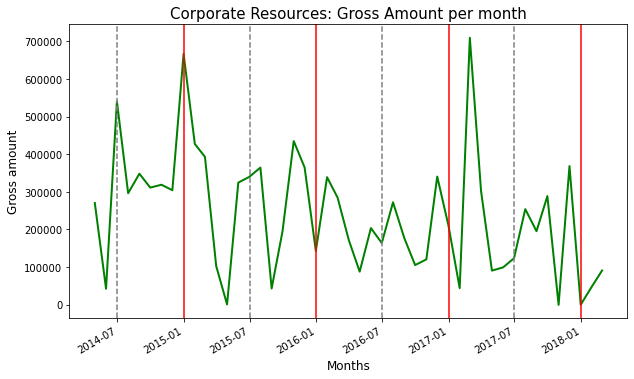

In [19]:
import matplotlib.pyplot as plt
x = df_corporate_resources.set_index('TRANS DATE').groupby(pd.Grouper(freq='M')).agg({'ORIGINAL GROSS AMT':'sum'})
x.reset_index(level=0, inplace=True)

plt.plot(x['TRANS DATE'],x['ORIGINAL GROSS AMT'],color='green',linewidth=2, markersize=12)
plt.gcf().autofmt_xdate()
plt.title('Corporate Resources: Gross Amount per month', fontsize=15)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Gross amount', fontsize=12)
plt.axvline(x=['2014-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2016-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2017-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-01-01'], color='red')
plt.axvline(x=['2016-01-01'], color='red') 
plt.axvline(x=['2017-01-01'], color='red') 
plt.axvline(x=['2018-01-01'], color='red')

The directorate CYP&F Schools shows almost 33% expenses, another strong candidate. 

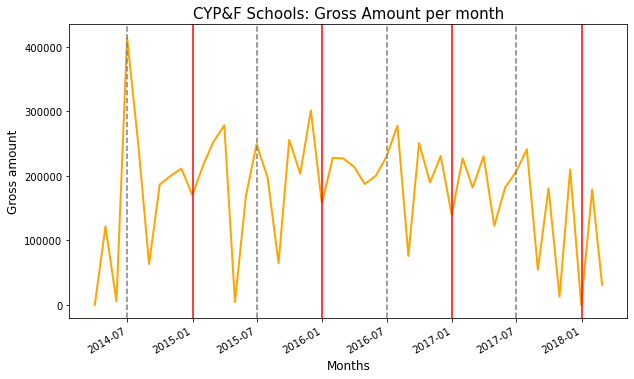

In [20]:
df_schools = data[data['Directorate']=='CYP&F Schools']
df_schools['Year'] = pd.DatetimeIndex(df_schools['TRANS DATE']).year 
df_schools['Month'] = pd.DatetimeIndex(df_schools['TRANS DATE']).month

y = df_schools.set_index('TRANS DATE').groupby(pd.Grouper(freq='M')).agg({'ORIGINAL GROSS AMT':'sum'})
y.reset_index(level=0, inplace=True)
plt.plot(y['TRANS DATE'],y['ORIGINAL GROSS AMT'],color='orange',linewidth=2, markersize=12)
plt.gcf().autofmt_xdate()
plt.title('CYP&F Schools: Gross Amount per month', fontsize=15)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Gross amount', fontsize=12)
plt.axvline(x=['2014-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2016-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2017-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-01-01'], color='red')
plt.axvline(x=['2016-01-01'], color='red') 
plt.axvline(x=['2017-01-01'], color='red') 
plt.axvline(x=['2018-01-01'], color='red') 

The directorate Local services shows almost 16% expenses. 

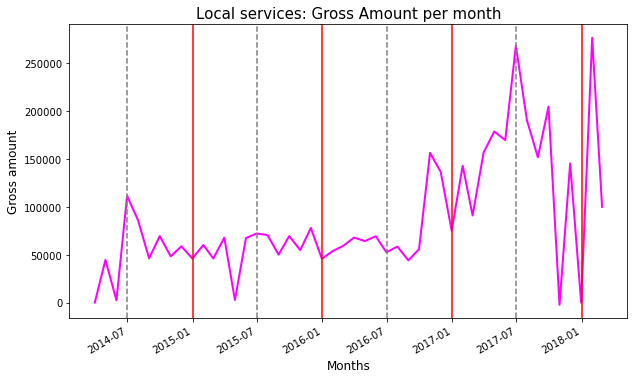

In [21]:
df_local = data[data['Directorate']=='Local services']
df_local['Year'] = pd.DatetimeIndex(df_local['TRANS DATE']).year 
df_local['Month'] = pd.DatetimeIndex(df_local['TRANS DATE']).month

z = df_local.set_index('TRANS DATE').groupby(pd.Grouper(freq='M')).agg({'ORIGINAL GROSS AMT':'sum'})
z.reset_index(level=0, inplace=True)
plt.plot(z['TRANS DATE'],z['ORIGINAL GROSS AMT'],color='magenta',linewidth=2, markersize=12)
plt.gcf().autofmt_xdate()
plt.title('Local services: Gross Amount per month', fontsize=15)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Gross amount', fontsize=12)
plt.axvline(x=['2014-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2016-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2017-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-01-01'], color='red')
plt.axvline(x=['2016-01-01'], color='red') 
plt.axvline(x=['2017-01-01'], color='red') 
plt.axvline(x=['2018-01-01'], color='red') 

**Summary table**

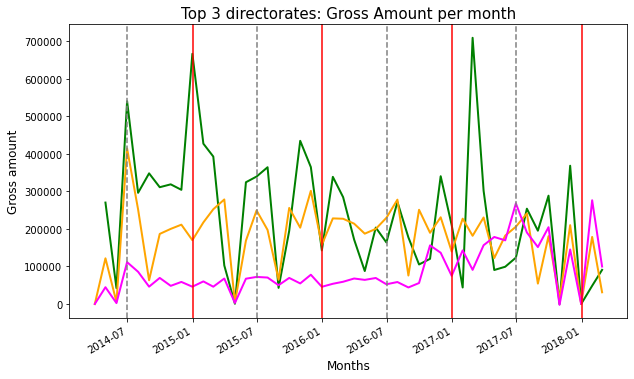

In [22]:
plt.plot(x['TRANS DATE'],x['ORIGINAL GROSS AMT'],color='green',linewidth=2, markersize=12)
plt.plot(y['TRANS DATE'],y['ORIGINAL GROSS AMT'],color='orange',linewidth=2, markersize=12)
plt.plot(z['TRANS DATE'],z['ORIGINAL GROSS AMT'],color='magenta',linewidth=2, markersize=12)
plt.gcf().autofmt_xdate()
plt.title('Top 3 directorates: Gross Amount per month', fontsize=15)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Gross amount', fontsize=12)
plt.axvline(x=['2014-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2016-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2017-07-01'], color='gray', linestyle='--')
plt.axvline(x=['2015-01-01'], color='red')
plt.axvline(x=['2016-01-01'], color='red') 
plt.axvline(x=['2017-01-01'], color='red') 
plt.axvline(x=['2018-01-01'], color='red') 

### 3.3 Outliers' treatment

In [23]:
print(x.describe())

       ORIGINAL GROSS AMT
count           47.000000
mean        240819.196170
std         162950.130787
min           -401.820000
25%         103967.825000
50%         253913.900000
75%         339140.550000
max         709169.610000


<AxesSubplot:>

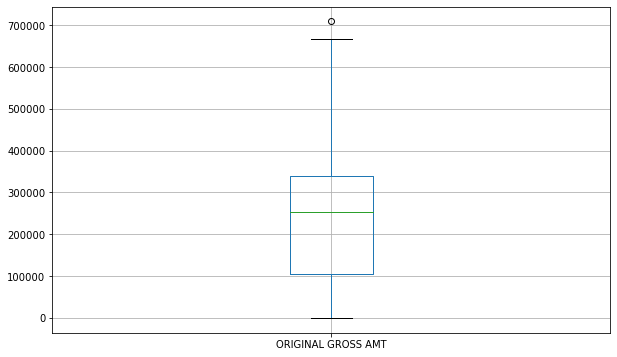

In [24]:
x.boxplot() #We have an outlier

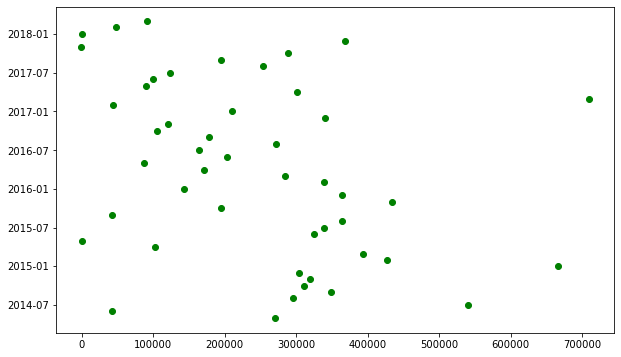

In [25]:
plt.scatter(x['ORIGINAL GROSS AMT'],x['TRANS DATE'],c='g') #We have 3 outliers

In [26]:
x[x['ORIGINAL GROSS AMT']>500000]

,TRANS DATE,ORIGINAL GROSS AMT
2,2014-06-30,540198.56
8,2014-12-31,666557.89
34,2017-02-28,709169.61


In [27]:
x[x['ORIGINAL GROSS AMT']<0]

,TRANS DATE,ORIGINAL GROSS AMT
42,2017-10-31,-401.82


In [28]:
x['ORIGINAL GROSS AMT'] = x['ORIGINAL GROSS AMT'].replace([0,614.03,540198.56,666557.89,709169.61],x['ORIGINAL GROSS AMT'].median())
x['ORIGINAL GROSS AMT'].iloc[42] = x['ORIGINAL GROSS AMT'].median()
x

,TRANS DATE,ORIGINAL GROSS AMT
0,2014-04-30,270203.60
1,2014-05-31,42329.58
2,2014-06-30,253913.90
3,2014-07-31,296205.76
4,2014-08-31,348063.66
5,2014-09-30,311109.89
6,2014-10-31,318767.39
7,2014-11-30,304180.12
8,2014-12-31,253913.90
9,2015-01-31,427149.81


### 3.4 Identifing the best method (algorithm)

---
___
**PROBLEM STATEMENT:** 
Build a model to forecast the expenses of the directorate Corporate Resources for the next 2 years so the most suitable algorithm to use will be ARIMA Model.
___
---

## 4. FORECASTING FOR DIRECTORATE "Corporate Resources" 

### 4.1 Rolling

In [29]:
#Time series analysis: rolling 12 months
#Calculating rolling estadistics
indexedDataset = x.set_index(['TRANS DATE'])
rolmean = indexedDataset.rolling(window=12).mean() #monthly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd) 
#The value on 2015-02-28 after rolling is the mean of the first
#12 values in the original data.

            ORIGINAL GROSS AMT
TRANS DATE                    
2014-04-30                 NaN
2014-05-31                 NaN
2014-06-30                 NaN
2014-07-31                 NaN
2014-08-31                 NaN
2014-09-30                 NaN
2014-10-31                 NaN
2014-11-30                 NaN
2014-12-31                 NaN
2015-01-31                 NaN
2015-02-28                 NaN
2015-03-31       276771.103333
2015-04-30       275413.628333
2015-05-31       298915.748333
2015-06-30       306050.951667
2015-07-31       311727.809167
2015-08-31       286307.773333
2015-09-30       276620.505000
2015-10-31       286280.850833
2015-11-30       291325.908333
2015-12-31       282062.100833
2016-01-31       274695.013333
2016-02-29       265680.541667
2016-03-31       271431.467500
2016-04-30       257588.943333
2016-05-31       247523.920833
2016-06-30       232893.135000
2016-07-31       225203.476667
2016-08-31       236398.580000
2016-09-30       228935.845000
2016-10-

### 4.2 Stationarity validation

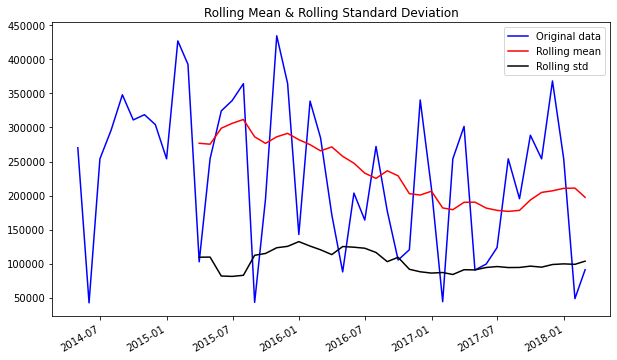

In [30]:
#let's see if the mean and standard deviation are constant.
orig = plt.plot(indexedDataset,color='blue',label='Original data')
mean = plt.plot(rolmean,color='red',label='Rolling mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.gcf().autofmt_xdate()
plt.show()
#From the graphic we have a glimpse that the mean and the std are 
#not constant so the data doesn't seem stationary. 

In [31]:
#Checking with stadistic tests (Ho: timeseries is not stationary)
from statsmodels.tsa.stattools import adfuller
    # Dickey-Fuller Test
print('Results of Dickey-Fuller Test')
result = adfuller(z['ORIGINAL GROSS AMT'], autolag='AIC')
dfoutput = pd.Series(result[0:4],index=['Test statistic','pvalue','#Lags used','Number of obs used'])
for key,value in result[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
if result[1] > 0.05: print('Series is not Stationary')
else: print('Series is Stationary')
    #We have a pvalue of  0.390078

Results of Dickey-Fuller Test
Test statistic          -1.780714
pvalue                   0.390078
#Lags used               1.000000
Number of obs used      46.000000
Critical Value (1%)     -3.581258
Critical Value (5%)     -2.926785
Critical Value (10%)    -2.601541
dtype: float64
Series is not Stationary


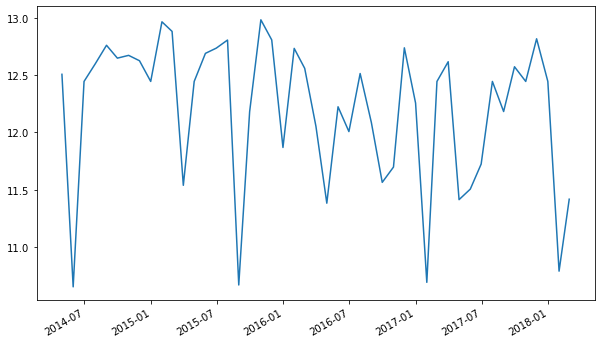

In [32]:
#Estimating the trend
import numpy as np
    #Numbers on the y axis have changed because we've 
    #changed the scale through a logaritmic function. 
    #We see the trend also has changed
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.gcf().autofmt_xdate()

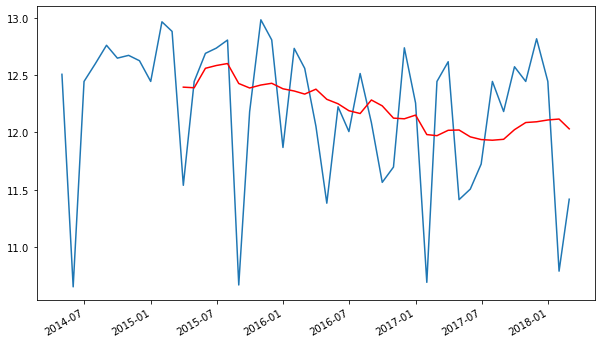

In [33]:
#Calculating the moving average with the same window but taking the 
#log series.
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')
plt.gcf().autofmt_xdate()
    #The mean is still not stationary but it's quite better than the 
    #previous one so we can say the data is not stationary again.

In [34]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
    #Then we remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,ORIGINAL GROSS AMT
TRANS DATE,
2015-03-31,-0.856062
2015-04-30,0.055025
2015-05-31,0.130173
2015-06-30,0.151700
2015-07-31,0.204923
2015-08-31,-1.757171
2015-09-30,-0.207628
2015-10-31,0.568865
2015-11-30,0.378235


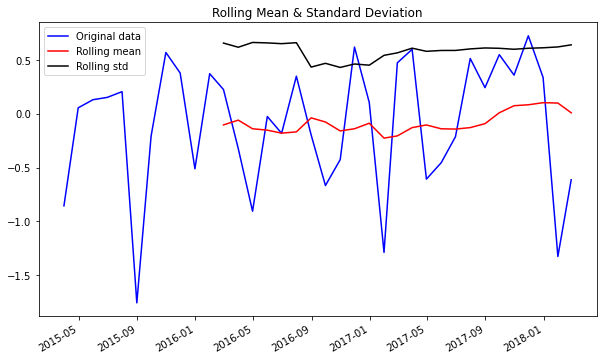

Results of Dickey-Fuller Test
Test statistic         -5.906714e+00
pvalue                  2.697868e-07
#Lags used              1.000000e+00
Number of obs used      3.400000e+01
Critical Value (1%)    -3.639224e+00
Critical Value (5%)    -2.951230e+00
Critical Value (10%)   -2.614447e+00
dtype: float64
Series is Stationary


In [35]:
def test_stationarity(timeseries):
    #Determining rolling stadistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    #Plot rolling stadistics:
    orig = plt.plot(timeseries,color='blue',label='Original data')
    mean = plt.plot(movingAverage ,color='red',label='Rolling mean')
    std = plt.plot(movingSTD ,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.gcf().autofmt_xdate()
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test')
    result = adfuller(timeseries['ORIGINAL GROSS AMT'], autolag='AIC')
    dfoutput = pd.Series(result[0:4],index=['Test statistic','pvalue','#Lags used','Number of obs used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if result[1] > 0.05 : print('Series is not Stationary')
    else: print('Series is Stationary')
test_stationarity(datasetLogScaleMinusMovingAverage)
    #The p-value is 5.252e-08 <0.05           -> now stationary
    #and the Critical value > Test statistic  -> now stationary

In [36]:
#The graphic shows no such trend in the mean or the std, both look much better than its predecesor. 

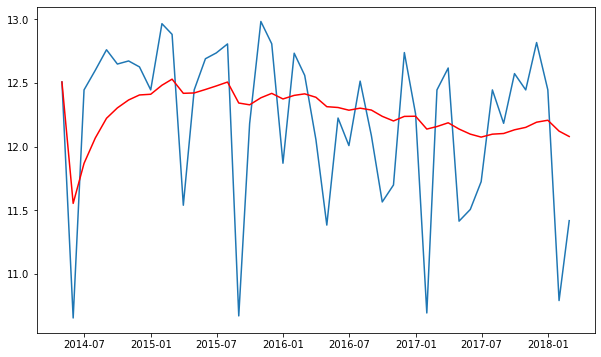

In [37]:
#Time to see the trend inside the time series
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red') 
     #As the timeseries progresses the average is also
     #progressing towards the lower side meaning the trend
     #goes downward and keeps decreasing with respect to the time.

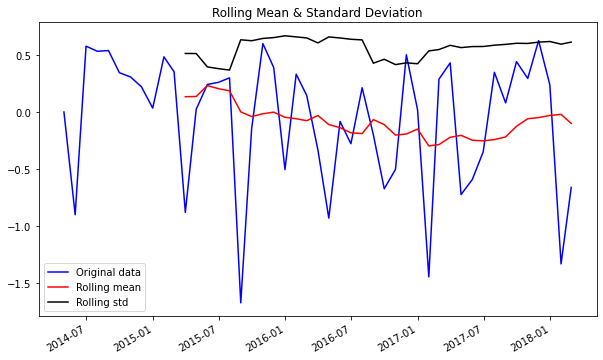

Results of Dickey-Fuller Test
Test statistic         -6.064998e+00
pvalue                  1.187623e-07
#Lags used              1.000000e+00
Number of obs used      4.500000e+01
Critical Value (1%)    -3.584829e+00
Critical Value (5%)    -2.928299e+00
Critical Value (10%)   -2.602344e+00
dtype: float64
Series is Stationary


In [38]:
#another transformation
indexedDataset_logScale.dropna(inplace=True)
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)  
    #This was just in case and there are no variations 

### 4.3 ARIMA MODEL (p,d,q)

(Autoregressive Integrated Moving Average Model)

ARIMA model has 3 models in it: 
- AR model or auto regressive
- MA model for moving average
- I model for the integration

About the parameters:
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

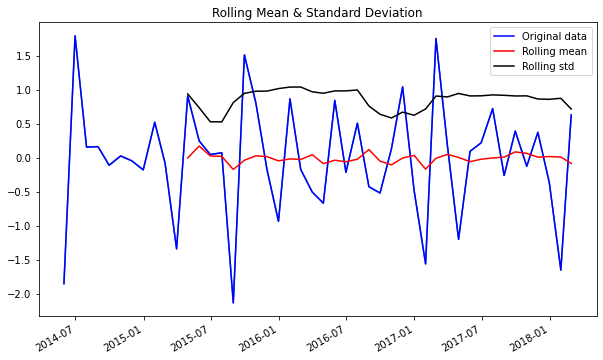

Results of Dickey-Fuller Test
Test statistic         -7.263724e+00
pvalue                  1.655785e-10
#Lags used              2.000000e+00
Number of obs used      4.300000e+01
Critical Value (1%)    -3.592504e+00
Critical Value (5%)    -2.931550e+00
Critical Value (10%)   -2.604066e+00
dtype: float64
Series is Stationary


In [39]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)
    #Now we see the mean and std are quite flat and so much better than before.
    #Stationarity = constant mean, constant variance & autocovariance that doesn't depend on time
    #Officially can say the time series are stationary now.

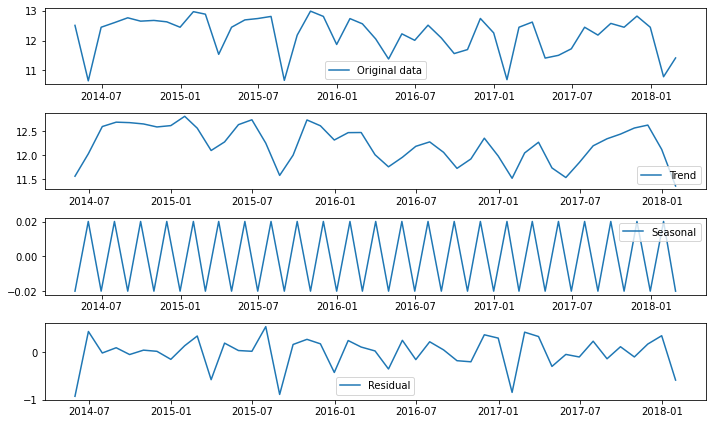

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,period=2)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

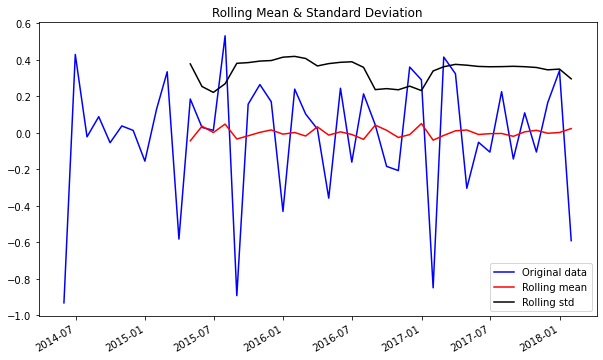

Results of Dickey-Fuller Test
Test statistic          -4.295170
pvalue                   0.000453
#Lags used               8.000000
Number of obs used      36.000000
Critical Value (1%)     -3.626652
Critical Value (5%)     -2.945951
Critical Value (10%)    -2.611671
dtype: float64
Series is Stationary


In [41]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
#The function Seasonal decompose changed the output to series instead of dataframe
#We proceed to change the type.
serie = pd.Series.to_frame(decomposedLogData)
serie.columns = ['ORIGINAL GROSS AMT']
test_stationarity(serie)
    #From the graph output, visually we can say it's not stationary
    #that's why the moving average parameter must be in place
    #to smoothen the graph and predict whay's next

#### 4.3.1 ACF and PACF plots

In [42]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols') #Ordinary least square method

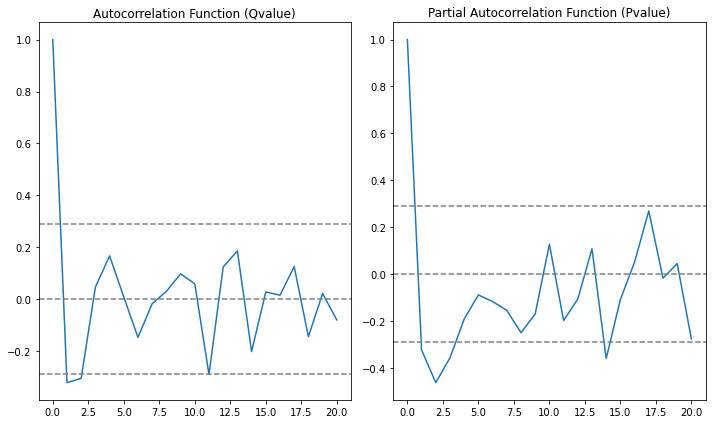

In [43]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function (Qvalue)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (Pvalue)')
plt.tight_layout()
    #Both the value of P and Q are between the interval [0,2.5]

#### 4.3.2 AR Model

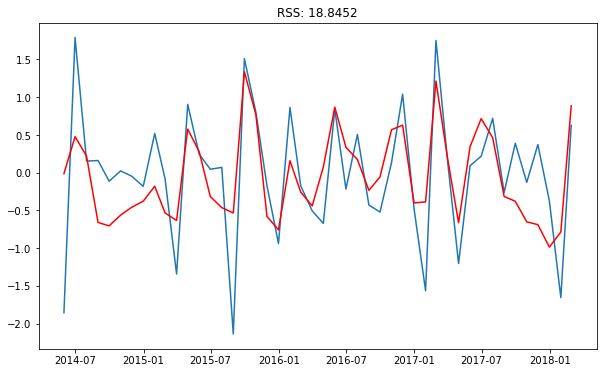

In [45]:
%%capture --no-display
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(indexedDataset_logScale,order=(2,1,2)) #p,d,q 
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-datasetLogDiffShifting['ORIGINAL GROSS AMT'])**2))
print('Plotting AR Model')
    #We want the lowest RSS value but instead have 18.3441

#### 4.3.3 MA Model

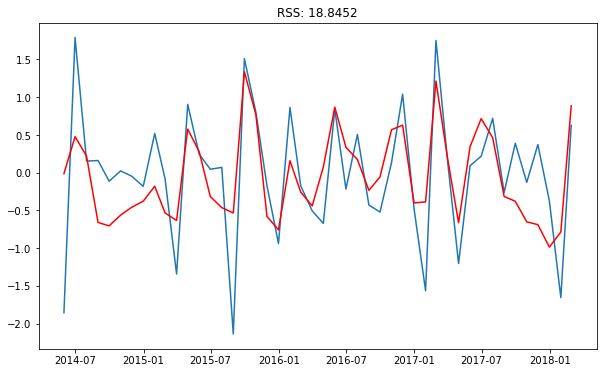

In [47]:
%%capture --no-display
#MA Model
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4F'% sum((results_MA.fittedvalues-datasetLogDiffShifting['ORIGINAL GROSS AMT'])**2))
print('Plotting MA Model')

#### 4.3.4 Model ARIMA

Text(0.5, 1.0, 'RSS: 18.8452')

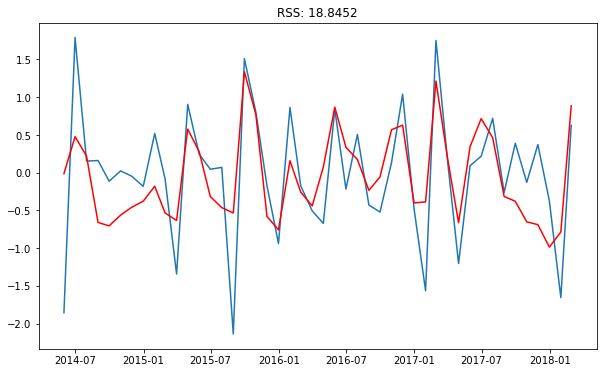

In [50]:
%%capture --no-display
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4F'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['ORIGINAL GROSS AMT'])**2))
    #Here the ARIMA model brings an RSS of 18.3441

In [51]:
#Fitting on the time series converting the fitted values into series format
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

TRANS DATE
2014-05-31   -0.012004
2014-06-30    0.477432
2014-07-31    0.220538
2014-08-31   -0.658555
2014-09-30   -0.704378
dtype: float64


In [52]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

TRANS DATE
2014-05-31   -0.012004
2014-06-30    0.465427
2014-07-31    0.685965
2014-08-31    0.027410
2014-09-30   -0.676968
2014-10-31   -1.238078
2014-11-30   -1.695395
2014-12-31   -2.072716
2015-01-31   -2.252083
2015-02-28   -2.785763
2015-03-31   -3.418380
2015-04-30   -2.840373
2015-05-31   -2.561804
2015-06-30   -2.877287
2015-07-31   -3.340019
2015-08-31   -3.873093
2015-09-30   -2.536057
2015-10-31   -1.767554
2015-11-30   -2.346387
2015-12-31   -3.103888
2016-01-31   -2.944830
2016-02-29   -3.202042
2016-03-31   -3.641223
2016-04-30   -3.565785
2016-05-31   -2.697843
2016-06-30   -2.361236
2016-07-31   -2.186840
2016-08-31   -2.420961
2016-09-30   -2.476436
2016-10-31   -1.907509
2016-11-30   -1.277326
2016-12-31   -1.677157
2017-01-31   -2.063971
2017-02-28   -0.849291
2017-03-31   -0.649053
2017-04-30   -1.311032
2017-05-31   -0.967181
2017-06-30   -0.250334
2017-07-31    0.213963
2017-08-31   -0.101229
2017-09-30   -0.479354
2017-10-31   -1.130055
2017-11-30   -1.817942


In [53]:
#Having the predictions run for the fitted values
predictions_ARIMA_log = indexedDataset_logScale
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['ORIGINAL GROSS AMT'],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum)
predictions_ARIMA_log.head()

TRANS DATE
2014-04-30          NaN
2014-05-31    10.641237
2014-06-30    12.910178
2014-07-31    13.284775
2014-08-31    12.787551
dtype: float64

Text(0.5, 1.0, 'ARIMA Model (orange line)')

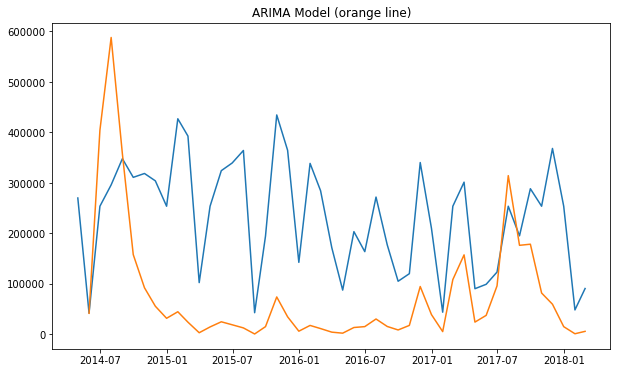

In [54]:
#Bringing the data in the original format.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('ARIMA Model (orange line)')

#### 4.3.5 Forecasts

In [55]:
#Time to do predictions
indexedDataset_logScale.count()

ORIGINAL GROSS AMT    47
dtype: int64

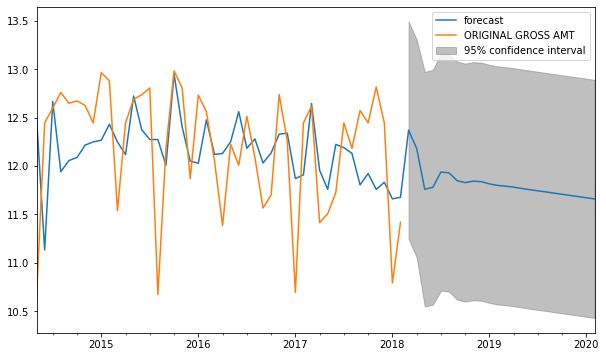

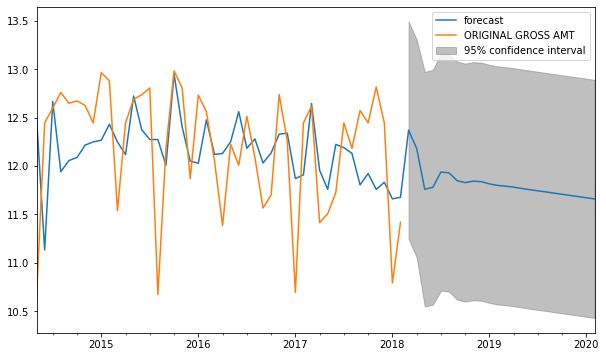

In [61]:
results_ARIMA.plot_predict(1, 46 + 12*2) #I wanna predict 2 years (12*2 months)

## 5. CONCLUSION 

According to the graph above, the expenses of the "Corporate Resources" directory would be decreasing 
for the next 2 years.